<a href="https://colab.research.google.com/github/lbusatto/otros/blob/main/DiploDS_2023_Cuatrimestre1_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Examen Diplomatura de Ciencias de Datos (Gestión y Análisis de datos)**

A continuación, se detallan las indicaciones para la resolución del examen. Tenga a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El examen se realiza de forma grupal de acuerdo a la asignación previamente realizada (Grupo 1, Grupo 2, Grupo 3, Grupo 4).
2. La fecha de entrega límite del trabajo es el **Martes 11 de Julio a las 23:30 hs (Argentina)**, vía mail con copia a los profesores del curso:

- mscavarda@uade.edu.ar
- rucasas@uade.edu.ar
- sbarreda@uade.edu.ar

La entrega debe contar con el código generado en Python, cualquier soporte visual adicional (por ejemplo un dashboard de Tableau) y los datos utilizados. *Nota: No olvidar adjuntar los dataset en caso que estos no estén disponibles en la web (API, Webpage, etc).*<br>
3. Tanto el código como el análisis y las visualizaciones realizadas en Python se deben entregan en un notebook en formato **.ipynb**.<br>
4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Collab, Spyder o VSCode, sin embargo, el trabajo final debe ser entregado en un notebook como está estipulado en el punto 3.<br>
5. Para visualizaciones se deben usar las librerías **matplotlib** y **seaborn** además de herramientas de visualización autoservicio como Tableau, PowerBi u otras. Como requisito mínimo deben incluir al menos 3 visualizaciones directamente sobre **matplotlib** en el notebook.<br>
6. La defensa del trabajo se realizará el **Jueves 13 de julio de forma grupal y presencial** (formato híbrido admitido para quienes no puedan estar presentes). Se les brindará un espacio entre **30 minutos para la exposición** (aproximadamente 5 minutos por integrante) y luego habrá espacio a preguntas sobre el trabajo. La exposición se deberá realizar con Slides (Powerpoint, Google Slides o similar) y se permite presentar adicionalmente contenido interactivo (ej. un Dashboard) si esto aporta claridad a la defensa.<br>
7. La nota se obtendrá en base a un promedio entre el desarrollo del trabajo (código y comentarios), defensa del mismo en forma grupal (cohesión del mensaje, coordinación entre exposiciones, tiempo total utilizado) y exposición individual.<br>
8. Los dataset a utilizar son libres, siempre y cuando tengan la confirmación de los docentes (la semana del 26 de junio tienen tiempo de hacer un primer análisis y presentar sus propuestas). En caso que no consigan un dataset que les sea de interés se les proveerá uno.<br>

---




### **Datos del Grupo**

Nombre y Apellido | LU
------------------|---
 |
 |
 |
 |
 |
 |




---




### **Criterio de evaluación**

Los dataset elegidos deben ser importados y proceder a trabajar con los mismos aplicando los conceptos de limpieza, gestión y transformaciones con el objetivo de encontrar patrones y realizar visualizaciones.

Como parte del examen se evaluarán los siguientes conceptos:

* Importar datos desde fuentes externas
* Limpieza de datos
* Gestión de datos y transformaciones
* Técnicas para rellenar nulos
* Visualizaciones
* Almacenamiento de resultados
* Claridad en el storytelling
* Coherencia en la presentación (colores, estilos, formatos, convenciones, etc).
* Comentarios (cada bloque de código debe tener su correspondiente explicación en un comentario/markdown previo, pudiendo además sumar comentarios dentro del código)
* [BONUS]: Se tendrá en consideración el utilizar datos de diversas fuentes, el analizar datos de naturaleza diversa (tiempo, geolocalización, análisis de lenguaje natural -NLP-, etc).

Los dataset deberán contar con información diversa que permita trabajar además de la limpieza, con **al menos**:
- Datos temporales
- Transformación de datos
- Diversos tipos de visualizaciones
---



### **Motivación - Objeto de estudio**




---

### **Planteo de hipótesis**








---

### **Herramientas utilizadas**







---

### **Carga de datos**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [ ]:
ruta_archivo = 'https://raw.githubusercontent.com/lbusatto/otros/main/parsed.csv'
df = pd.read_csv(ruta_archivo)

#Chicos tenemos que encontra la vuelta para poder abrir todo el archivo completo

In [ ]:
###Limpieza de datos##

#Borrar columnas 'Unnamed: 0.1' y 'Unnamed: 0' por contenido irrelevante
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
#porner de indice la columna Id_recorrido
df = df.set_index('Id_recorrido')

In [ ]:
#Retira las ',' del string y convierte a float la columna duracion_recorrido
df['duracion_recorrido'] = df['duracion_recorrido'].str.replace(',', '')
df['duracion_recorrido'] = pd.to_numeric(df['duracion_recorrido'], errors='coerce')

In [ ]:
# Convertir la columna 'fecha_origen_recorrido' al tipo de dato de fecha
df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'])

# Convertir la columna 'fecha_destino_recorrido ' al tipo de dato de fecha
df['fecha_destino_recorrido'] = pd.to_datetime(df['fecha_destino_recorrido'])

In [ ]:
df.info()

In [ ]:
media_edad = df['duracion_recorrido'].mean()
media_edad

1277.2838075166842

<Axes: xlabel='Genero', ylabel='Minutos'>

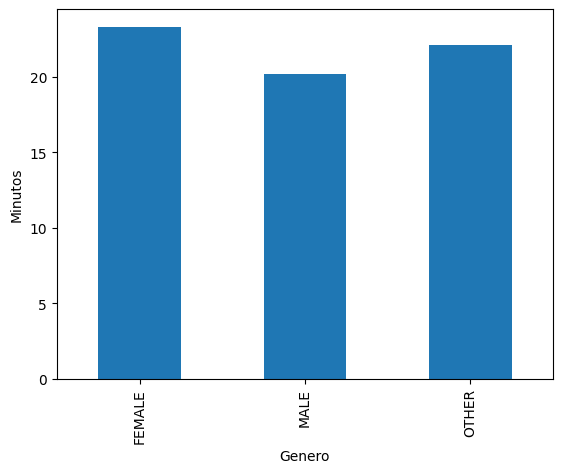

In [ ]:
#Lucas Busatto
#Promedio de duracion de viajes segun genero
duration = df.groupby('género')['duracion_recorrido'].agg('mean')
duration = duration.rename_axis('Genero')
duration = duration/ 60
duration.columns = ['Promedio en min']
graph = duration.plot.bar()
graph.set_ylabel('Minutos')

graph

In [ ]:
df.head() #cris, vista del dataframa para seguir puliendo la data

,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
Id_recorrido,,,,,,,,,,,,,,,,
16997896BAEcobici,2471,2023-01-22 10:23:53,191BAEcobici,191 - Rivadavia y 9 de Julio,Pellegrini Y Rivadavia Av.,-58.380836,-34.607931,2023-01-22 11:05:04,30BAEcobici,030 - Peña,Peña & Azcuenaga,-58.397370,-34.590821,948377BAEcobici,ICONIC,MALE
17001042BAEcobici,2979,2023-01-22 19:35:27,191BAEcobici,191 - Rivadavia y 9 de Julio,Pellegrini Y Rivadavia Av.,-58.380836,-34.607931,2023-01-22 20:25:06,51BAEcobici,051 - TUCUMAN,Tucuman & 9 De Julio Av.,-58.382126,-34.601478,948377BAEcobici,ICONIC,MALE
17002153BAEcobici,598,2023-01-22 23:04:44,229BAEcobici,243 - PLAZOLETA CELEDONIO FLORES,Cordoba 6599,-58.451530,-34.581576,2023-01-22 23:14:42,101BAEcobici,101 - Fitz Roy,Fitz Roy 1092 & Loyola,-58.442440,-34.589186,670263BAEcobici,ICONIC,MALE
16999995BAEcobici,2472,2023-01-22 17:22:26,5BAEcobici,005 - Plaza Italia,Av. Sarmiento 2601,-58.420954,-34.580550,2023-01-22 18:03:38,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,945249BAEcobici,ICONIC,MALE
16999006BAEcobici,973,2023-01-22 14:29:49,477BAEcobici,311 - SEC. DE INNOVACION Y TRANSFORMACIÓN,Av. Caseros 2309,-58.395054,-34.635005,2023-01-22 14:46:02,146BAEcobici,146 - Hospital Francés,"3024 Calvo, Carlos",-58.407842,-34.622112,245781BAEcobici,ICONIC,FEMALE


---

### **Descripción de las columnas**



In [ ]:
#ver cuantos datos tiene el archivo
print(df.shape)

(1137714, 18)


---

### **Limpieza de datos**



---

### **Transformación de datos**

---

### **Análisis y Visualizaciones**


---

### **Conclusiones**


---

### **Almacenamiento de resultados**


---